In [1]:
import numpy as np
import pickle
import cv2
import os
import keras
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import backend as K
import pickle
import joblib
from keras.models import model_from_json
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = "true"


1 Physical GPUs, 1 Logical GPUs


In [3]:
ph1=r"C:\Users\aanis\Desktop\plantvillage1\aa\segmented\tomato"
li=0
x=[]
y=[]
for i in os.listdir(ph1):
    lab=[0,0,0,0,0,0,0,0,0,0]
    lab[li]=1
    ph2=ph1+f'\{i}'
    #print(ph2)
    li+=1
    for j in os.listdir(ph2):
        #print(j)
        ph3=ph2+f'\{j}'
        #print(x,np.array(cv2.imread(ph3)).reshape(256*256*3))
        #print(lab)
        x.append(np.array(cv2.imread(ph3)))
        y.append(lab)
        

In [4]:
print(np.array(y).shape)
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2, random_state = 42) 
del x
del y

(18159, 10)


In [5]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [6]:
classifier = Sequential()

classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(256, 256, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())


classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

classifier.add(Flatten())

classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())

classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())

classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())

classifier.add(Dense(units = 10, activation = 'softmax'))
classifier.summary()






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

In [7]:
classifier.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [8]:
width=256
height=256
depth=3
n_classes=10
EPOCHS = 25
BS = 16

In [9]:
history = classifier.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

Epoch 1/25
907/907 [==============================] - 386s 414ms/step - loss: 2.1503 - accuracy: 0.3863 - val_loss: 2.2273 - val_accuracy: 0.4502
Epoch 2/25
907/907 [==============================] - 421s 464ms/step - loss: 1.3284 - accuracy: 0.5553 - val_loss: 1.0183 - val_accuracy: 0.6594
Epoch 3/25
907/907 [==============================] - 365s 402ms/step - loss: 1.1387 - accuracy: 0.6100 - val_loss: 1.0675 - val_accuracy: 0.6572
Epoch 4/25
907/907 [==============================] - 368s 406ms/step - loss: 1.0012 - accuracy: 0.6626 - val_loss: 2.4158 - val_accuracy: 0.4276
Epoch 5/25
907/907 [==============================] - 344s 379ms/step - loss: 0.9037 - accuracy: 0.6965 - val_loss: 1.8006 - val_accuracy: 0.4942
Epoch 6/25
907/907 [==============================] - 359s 395ms/step - loss: 0.8501 - accuracy: 0.7125 - val_loss: 0.9359 - val_accuracy: 0.7208
Epoch 7/25
907/907 [==============================] - 368s 406ms/step - loss: 0.8126 - accuracy: 0.7293 - val_loss: 0.8606 -

In [10]:
classifier.save("alexnet")

C:\Users\aanis\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\aanis\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: alexnet\assets


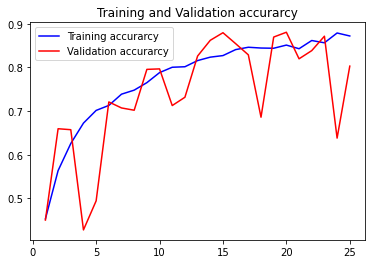

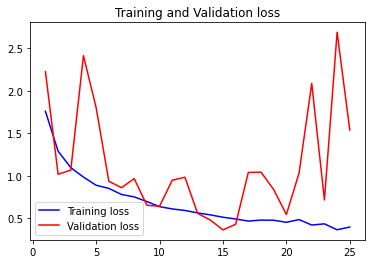

In [12]:
train=history
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [15]:
scores = classifier.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

114/114 [==============================] - 13s 118ms/step - loss: 1.5391 - accuracy: 0.8029
Test Accuracy: 80.28634190559387
